In [1]:
! pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
## 3D location(cartesian) of EEG channels
loc={}
loc['F2'] = (8.04,	-2.68,	5.31) #0
loc['Fp2']= (9.83,	-3.36,	0.751) #1
loc['AFz']= (10.2,	0, 3.53) #2
loc['F1'] = (9.61,	2.4,	3.52) #3
loc['Fp1'] = (10.6,	1.98,	-1.24) #4
loc['CP3'] =(-0.17, 7.53, 2.95) #5
loc['P5']= (-3.93, 7.09, 0.55) #6
loc['Pz'] = (-5.62,	-6.89e-16,	7.11) #7
loc['O1'] = (-8.32,	3.7,	-3.37) #8
loc['Oz'] = (-9.1,	2.1,	-3.99) #9
loc['O2'] = (-9.1,	-2.1,	-3.66) #10
loc['CP4']= (-4.91, -6.52, 3.10)#11
loc['P6']=  (-5.22, -6.45,-1.59) #12

# Print the dictionary
print(loc)


{'F2': (8.04, -2.68, 5.31), 'Fp2': (9.83, -3.36, 0.751), 'AFz': (10.2, 0, 3.53), 'F1': (9.61, 2.4, 3.52), 'Fp1': (10.6, 1.98, -1.24), 'CP3': (-0.17, 7.53, 2.95), 'P5': (-3.93, 7.09, 0.55), 'Pz': (-5.62, -6.89e-16, 7.11), 'O1': (-8.32, 3.7, -3.37), 'Oz': (-9.1, 2.1, -3.99), 'O2': (-9.1, -2.1, -3.66), 'CP4': (-4.91, -6.52, 3.1), 'P6': (-5.22, -6.45, -1.59)}


In [4]:
#Region directory to map EEG channels: Brain Lobe
reg_dict = {}
# Add elements to the dictionary with multiple values for each key
reg_dict['F2'] = ['Frontal'] #0
reg_dict['Fp2']= ['Frontal'] #1
reg_dict['AFz']= ['Frontal'] #2
reg_dict['F1'] = ['Frontal'] #3
reg_dict['Fp1'] = ['Frontal'] #4
reg_dict['CP3'] = ['Central'] #5
reg_dict['P5'] = ['Parietal'] #6
reg_dict['Pz'] = ['Parietal'] #7
reg_dict['O1'] = ['Occipital'] #8
reg_dict['Oz'] = ['Occipital'] #9
reg_dict['O2'] = ['Occipital'] #10
reg_dict['CP4'] = ['Central'] #11
reg_dict['P6'] = ['Parietal'] #12

# Print the dictionary
#print(reg_dict)
print (reg_dict['F1'][0])

Frontal


In [5]:
## Spatial neighbor dictionary
spnbor_dict = {}
# Add elements to the dictionary with multiple values for each key
#spnbor_dict['F2'] = ['AFz']
spnbor_dict['F2'] = ['F1','AFz']
#spnbor_dict['Fp2'] = ['Fp1']
spnbor_dict['Fp2'] = ['AFz','Fp1']
spnbor_dict['AFz'] = ['F1','F2','Fp1','Fp2']
#spnbor_dict['F1'] = ['AFz']
spnbor_dict['F1'] = ['F2','AFz']
#spnbor_dict['Fp1'] = ['Fp2']
spnbor_dict['Fp1'] = ['AFz','Fp2']
spnbor_dict['CP3'] = ['P5']
spnbor_dict['P5'] = ['CP3']
spnbor_dict['Pz'] = ['Oz','O1','O2']
spnbor_dict['O1'] = ['O2', 'Oz']
spnbor_dict['Oz'] = ['O1', 'O2', 'Pz']
spnbor_dict['O2'] = ['O1', 'Oz']
spnbor_dict['CP4'] = ['P6']
spnbor_dict['P6'] = ['CP4']
# Print the dictionary
print(spnbor_dict)


{'F2': ['F1', 'AFz'], 'Fp2': ['AFz', 'Fp1'], 'AFz': ['F1', 'F2', 'Fp1', 'Fp2'], 'F1': ['F2', 'AFz'], 'Fp1': ['AFz', 'Fp2'], 'CP3': ['P5'], 'P5': ['CP3'], 'Pz': ['Oz', 'O1', 'O2'], 'O1': ['O2', 'Oz'], 'Oz': ['O1', 'O2', 'Pz'], 'O2': ['O1', 'Oz'], 'CP4': ['P6'], 'P6': ['CP4']}


In [39]:
# ADHD MTE Graph: S1(event 1). Weights are obtained from the edge values of MTE graph
G1 = nx.DiGraph()

G1.add_node('Fp2')
G1.add_node('F2')
G1.add_node('O1')
#G1.add_node('Oz')

G1.add_edge('O1', 'Fp2', weight=0.009)
G1.add_edge('F2', 'Fp2', weight=0.017)
G1.add_edge('Fp2', 'O1', weight=0.021)
#G1.add_edge('Oz', 'O1', weight=0.021)


In [42]:
# ADHD MTE Graph: S1(event 2). Weights are obtained from the edge values of MTE graph
G2 = nx.DiGraph()

G2.add_node('F1')
G2.add_node('Fp2')
G2.add_node('Fp1')
G2.add_node('AFz')

G2.add_edge('AFz', 'F1', weight=0.009)
G2.add_edge('Fp2', 'F1', weight=0.013)
G2.add_edge('Fp1', 'F1', weight=0.017)
G2.add_edge('Fp2', 'AFz', weight=0.021)
#show_wgraph()


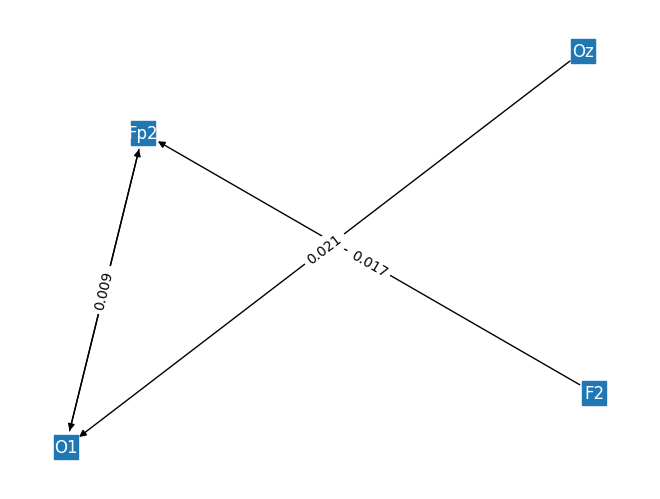

In [8]:
# Function: Weighted graph
def show_wgraph():
    plt.figure()
    pos = nx.spring_layout(G1)
    weight_labels = nx.get_edge_attributes(G1,'weight')
    nx.draw(G1,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G1,pos,edge_labels=weight_labels)
show_wgraph()

In [43]:
## Check the number of nodes of two graphs for subsequent operations:
# If len(G1.nodes)==len(G2.nodes)-> Substitution
# If len(G1.nodes)!=len(G2.nodes)-> Insertion(small graph, here G1) OR Deletion (from large graph, here G2)
print(len(G1.nodes),len(G2.nodes))

3 4


In [10]:
# Find common nodes in G1 and G2
#common_nodes = list(nx.intersection(G12, G21).nodes())
common_nodes = list(nx.intersection(G1, G2).nodes())
#subtracted_list = list(set(original_list) - set(elements_to_subtract))
#uncommon_nodes =list(G12.nodes-common_nodes)
uncommon_nodes =list(G1.nodes-common_nodes)
print("Common nodes between G1 and G2:", common_nodes)
print("UnCommon nodes between G1 and G2:", uncommon_nodes)

Common nodes between G1 and G2: ['Fp2']
UnCommon nodes between G1 and G2: ['Oz', 'F2', 'O1']


In [37]:
### New Substitution cost and new graph

import networkx as nx
import numpy as np

loc_dic ={'F2': (8.04, -2.68, 5.31), 'Fp2': (9.83, -3.36, 0.751), 'AFz': (10.2, 0, 3.53), 'F1': (9.61, 2.4, 3.52), 'Fp1': (10.6, 1.98, -1.24), 'CP3': (-0.17, 7.53, 2.95), 'P5': (-3.93, 7.09, 0.55), 'Pz': (-5.62, -6.89e-16, 7.11), 'O1': (-8.32, 3.7, -3.37), 'Oz': (-9.1, 2.1, -3.99), 'O2': (-9.1, -2.1, -3.66), 'CP4': (-4.91, -6.52, 3.1), 'P6': (-5.22, -6.45, -1.59)}

def Find_subst_cost(G1, G2, reg_dict, spnbor_dict):
    common_nodes = list(nx.intersection(G1, G2).nodes())
    uncommon_nodes =list(G1.nodes-common_nodes)
    uncommon_nodes_G1 = uncommon_nodes
    all_nodes_G2 = G2.nodes
    subst_costs = {}

    for n in uncommon_nodes_G1:
        brain_region_n = reg_dict[n][0]  # Get the brain region of node n in G1
        spatial_neighbors_n = spnbor_dict[n] if n in spnbor_dict else []  # Get spatial neighbors of node n in G1

        subst_cost = 0
        count = 0
        if any(reg_dict[n] == reg_dict[k] for k in all_nodes_G2) and any(n in spnbor_dict[k] for k in all_nodes_G2):
            #print("case 1")
            # Case a: Spatial neighbor of node in G1 exists in G2.nodes
            valid_nodes_a = [k for k in all_nodes_G2 if k in spnbor_dict[n]]

            if valid_nodes_a is not None and len(valid_nodes_a) > 0:
                p = valid_nodes_a[0]  # Find a node in G2 with the same region and spatial neighbors as n
                G2_replaced_edges= sum(G2.get_edge_data(edge[0], edge[1])['weight'] for edge in G2.edges(p) if G2.has_edge(*edge))
                if G2_replaced_edges is None:
                  G2_replaced_edges = 0
                G1_old_edges= sum(G1.get_edge_data(edge[0], edge[1])['weight'] for edge in G1.edges(n) if G1.has_edge(*edge))
                if G1_old_edges is None:
                  G1_old_edges = 0
                subst_cost += abs(G2_replaced_edges-G1_old_edges)  # Calculate substitution cost (replced nodes MTE-old node's MTE)
                count += 1
            ## case c: Find the channel in distant region (G2) than same region of G1.node (n)
            max_edge_value = float('-inf')
            for m in G2.nodes:
              if G1.has_edge(n, m):
                edge_values = [G1.get_edge_data(n, m)['weight']] #edge value between node in G1 (i.e; 'n') and G2 (i.e., 'm')
                #G1.edges[n][m]]
                max_edge_value = max(max_edge_value, max(edge_values, default=float('-inf'))) #compute max_MTE among all nodes in G2
            print("Substitution cost:",subst_cost)
            subst_cost += abs(max_edge_value-G1_old_edges)

    return subst_cost

Subst_cost= Find_subst_cost(G1,G2,reg_dict,spnbor_dict)

Substitution cost: 0.017


In [40]:
## Insertion cost (call for the graph with less no. of nodes) ## Need to change by adding new transformed graph

def update_graph_ins_cost(G):
  ins_cost=0
  nodes=['F2'] # for example, we found 'F2' as the significant node from MTE graph
  G.add_weighted_edges_from([('F2', 'Oz', 0.25)])
  # Initialize variables to store total weight and count of incoming and outgoing edges for each node
  total_weight_in = {node: 0 for node in nodes}
  total_weight_out = {node: 0 for node in nodes}
  count_in = {node: 0 for node in nodes}
  count_out = {node: 0 for node in nodes}

  # Iterate over nodes
  for node in nodes:
    # Iterate over incoming edges of node
    for predecessor in G.predecessors(node):
      weight = G[predecessor][node]['weight']
      total_weight_in[node] += weight
      count_in[node] += 1

    # Iterate over outgoing edges of node
    for successor in G.successors(node):
      weight = G[node][successor]['weight']
      total_weight_out[node] += weight
      count_out[node] += 1

    # Calculate the mean of edge weights for incoming and outgoing edges for each node
    mean_weight_in = {node: total_weight_in[node] / count_in[node] if count_in[node] > 0 else 0 for node in nodes}
    mean_weight_out = {node: total_weight_out[node] / count_out[node] if count_out[node] > 0 else 0 for node in nodes}

    # Calculate the total mean of mean_weight_in and mean_weight_out for all nodes
    ins_cost = sum(mean_weight_in.values()) / len(mean_weight_in)
    #print(ins_cost)
  return G, ins_cost
updated_graph_ins, ins_cost=update_graph_ins_cost(G2)

print ("Insertion cost is:",ins_cost)

Insertion cost is: 0.0


In [44]:
import networkx as nx

delete_cost = 0

def update_graph_del_cost(G2, D):
    # Step 1: Find nodes with special neighbors present in node list in G2
    nodes_with_neighbors = set()
    for node, neighbors in D.items():
        for neighbor in neighbors:
            if neighbor in G2.nodes():
                nodes_with_neighbors.add(node)

    # Step 2: Compute mean weights for nodes with neighbors
    mean_weights = {}
    for node in nodes_with_neighbors:
        total_weight_in = 0
        total_weight_out = 0
        count_in = 0
        count_out = 0

        # Calculate total weights and counts for incoming edges
        for predecessor in G2.predecessors(node):
            weight = G2[predecessor][node]['weight']
            total_weight_in += weight
            count_in += 1

        # Calculate total weights and counts for outgoing edges
        for successor in G2.successors(node):
            weight = G2[node][successor]['weight']
            total_weight_out += weight
            count_out += 1

        # Calculate mean weights for incoming and outgoing edges
        mean_weight_in = total_weight_in / count_in if count_in > 0 else 0
        mean_weight_out = total_weight_out / count_out if count_out > 0 else 0

        # Store mean weights
        mean_weights[node] = mean_weight_in + mean_weight_out

    # Step 3: Replace the node(s) with the least total mean with its neighbor and add associated edges
    min_mean_value = min(mean_weights.values())
    min_mean_nodes = [node for node, mean in mean_weights.items() if mean == min_mean_value]
    replaced_edges = []

    for min_mean_node in min_mean_nodes:
        neighbors_to_replace_with = D[min_mean_node]
        common_nodes = set(G2.neighbors(min_mean_node))
        for neighbor_to_replace_with in neighbors_to_replace_with:
            common_nodes &= set(G2.neighbors(neighbor_to_replace_with))

        # Add incoming edges of the node to its replaced neighbor
        for predecessor in G2.predecessors(min_mean_node):
            weight = G2[predecessor][min_mean_node]['weight']
            if predecessor not in common_nodes:
                for neighbor_to_replace_with in neighbors_to_replace_with:
                    G2.add_edge(predecessor, neighbor_to_replace_with, weight=weight)
                    replaced_edges.append((predecessor, neighbor_to_replace_with, weight))

        # Add outgoing edges of the node to its replaced neighbor
        for successor in G2.successors(min_mean_node):
            weight = G2[min_mean_node][successor]['weight']
            if successor not in common_nodes:
                for neighbor_to_replace_with in neighbors_to_replace_with:
                    G2.add_edge(neighbor_to_replace_with, successor, weight=weight)
                    replaced_edges.append((neighbor_to_replace_with, successor, weight))

        # Remove the node and its associated edges from G2
        G2.remove_node(min_mean_node)

    # Compute delete cost
    delete_cost = sum(mean_weights[min_mean_node] for min_mean_node in min_mean_nodes)

    return G2, delete_cost

# Example usage
G2 = nx.DiGraph()
G2.add_weighted_edges_from([('Fp2', 'AFz', 1), ('Fp2', 'Fp1', 2), ('AFz', 'F1', 1), ('AFz', 'Fp1', 3), ('F1', 'AFz', 4), ('Fp1', 'AFz', 2), ('Fp1', 'Fp2', 1)])

D = {'Fp2': ['AFz', 'Fp1'], 'AFz': ['F1', 'Fp1', 'Fp2'], 'F1': ['AFz'], 'Fp1': ['AFz', 'Fp2']}

updated_graph_del, delete_cost = update_graph_del_cost(G2, D)
print("Delete cost:", delete_cost)


Delete cost: 2.5


In [47]:
import networkx as nx
import numpy as np

# Placeholder for substitution cost function
def Find_subst_cost(G1, G2, reg_dict, spnbor_dict):
    # Implement your substitution cost function here
    return 0  # Replace with actual substitution cost calculation

# Placeholder for insertion cost function
def update_graph_ins_cost(G1):
    # Implement your insertion cost function here
    ins_cost = 0  # Replace with actual insertion cost
    updated_graph = G1.copy()  # Replace with actual updated graph
    return ins_cost, updated_graph

# Deletion cost function
def update_graph_del_cost(G2, D):
    delete_cost = 0

    # Step 1: Find nodes with special neighbors present in node list in G2
    nodes_with_neighbors = set()
    for node, neighbors in D.items():
        for neighbor in neighbors:
            if neighbor in G2.nodes():
                nodes_with_neighbors.add(node)

    # Step 2: Compute mean weights for nodes with neighbors
    mean_weights = {}
    for node in nodes_with_neighbors:
        total_weight_in = 0
        total_weight_out = 0
        count_in = 0
        count_out = 0

        # Calculate total weights and counts for incoming edges
        for predecessor in G2.predecessors(node):
            weight = G2[predecessor][node]['weight']
            total_weight_in += weight
            count_in += 1

        # Calculate total weights and counts for outgoing edges
        for successor in G2.successors(node):
            weight = G2[node][successor]['weight']
            total_weight_out += weight
            count_out += 1

        # Calculate mean weights for incoming and outgoing edges
        mean_weight_in = total_weight_in / count_in if count_in > 0 else 0
        mean_weight_out = total_weight_out / count_out if count_out > 0 else 0

        # Store mean weights
        mean_weights[node] = mean_weight_in + mean_weight_out

    # Step 3: Replace the node(s) with the least total mean with its neighbor and add associated edges
    min_mean_value = min(mean_weights.values())
    min_mean_nodes = [node for node, mean in mean_weights.items() if mean == min_mean_value]
    replaced_edges = []

    for min_mean_node in min_mean_nodes:
        neighbors_to_replace_with = D[min_mean_node]
        common_nodes = set(G2.neighbors(min_mean_node))
        for neighbor_to_replace_with in neighbors_to_replace_with:
            common_nodes &= set(G2.neighbors(neighbor_to_replace_with))

        # Add incoming edges of the node to its replaced neighbor
        for predecessor in G2.predecessors(min_mean_node):
            weight = G2[predecessor][min_mean_node]['weight']
            if predecessor not in common_nodes:
                for neighbor_to_replace_with in neighbors_to_replace_with:
                    G2.add_edge(predecessor, neighbor_to_replace_with, weight=weight)
                    replaced_edges.append((predecessor, neighbor_to_replace_with, weight))

        # Add outgoing edges of the node to its replaced neighbor
        for successor in G2.successors(min_mean_node):
            weight = G2[min_mean_node][successor]['weight']
            if successor not in common_nodes:
                for neighbor_to_replace_with in neighbors_to_replace_with:
                    G2.add_edge(neighbor_to_replace_with, successor, weight=weight)
                    replaced_edges.append((neighbor_to_replace_with, successor, weight))

        # Remove the node and its associated edges from G2
        G2.remove_node(min_mean_node)

    # Compute delete cost
    delete_cost = sum(mean_weights[min_mean_node] for min_mean_node in min_mean_nodes)

    return delete_cost, G2

# Compute Similarity Score
def compute_similarity_score(G1, G2):
    # Find common nodes
    common_nodes = set(G1.nodes) & set(G2.nodes)
    # For delete cost: Put the top (1) spatial neighbor of G2
    D = {'AFz': ['F1'], 'F1': ['AFz'], 'Fp1': ['Fp2'], 'T7': ['P7'], 'Pz': ['O1'], 'O1': ['O2'], 'O2': ['O1']}
    ## take the one spatial neighbor of same brain region
    Ec_Ins_del = 0
    delete_cost = float('inf')  # Initialize with a large number
    ins_cost = float('inf')  # Initialize with a large number
    updated_graph_ins = nx.DiGraph()
    updated_graph_del = nx.DiGraph()
    G_sub = nx.DiGraph()
    reg_dict = {}
    spnbor_dict = {}

    # Step 1: If the number of nodes are equal, compute substitution cost
    print(G1.nodes, G2.nodes)
    if len(G1.nodes) == len(G2.nodes):
        sub_cost = Find_subst_cost(G1, G2, reg_dict, spnbor_dict)

    # Step 2: If the number of nodes are not equal, compute insertion or deletion cost
    elif len(G1.nodes) < len(G2.nodes):
        ins_cost, updated_graph_ins = update_graph_ins_cost(G1)

    else:
        delete_cost, updated_graph_del = update_graph_del_cost(G2, D)

    # Step 3: Determine which operation (insertion or deletion) gives minimum cost
    if ins_cost < delete_cost:
        Ec_Ins_del = ins_cost
        transformed_graph = updated_graph_ins
    else:
        Ec_Ins_del = delete_cost
        transformed_graph = updated_graph_del  # This can be G2 if you are deleting from G2

    # Step 4: Compute substitution cost after equalizing the number of nodes
    sub_cost = Find_subst_cost(transformed_graph, G2, reg_dict, spnbor_dict)

    # Step 5: Compute similarity score
    similarity_score = sub_cost + Ec_Ins_del

    return similarity_score

# Example usage

similarity_score = compute_similarity_score(G1, G2)
print("Similarity score:", similarity_score)


['Fp2', 'F2', 'O1'] ['AFz', 'Fp1', 'F1']
Similarity score: 0.017
